**Standing on the shoulder of a giant** that is the primary thing it looks like when we talk about transfer learning.
Somebody somewhere with **mammoth machines** and **Argentinosaurus** size data, trained a huge and complex model and made it public, now we can leverage the work done by researchers  and re-train or re-design the trained model and make it specific towards our problem.

In [1]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

**We are going to take benefit from Inception-V3 pre-trained model, based on Inception-V3 we will try to retrain a new model.To do so we need the skelaton of model and the pretrained weights**

In [2]:
## To Download the weights for Inception-V3
# !wget --no-check-certificate "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"  \-O "/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

**Tensorflow based Keras provides the skelaton of the Inception-V3**

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

**1. Load the weights**
<br>
**2. Get the pretrained model skelaton**

In [4]:
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top=False,
                                weights=None)

**Loading pretrained weights to model skelaton**

In [5]:
pre_trained_model.load_weights(local_weights_file)

In [6]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

**Controlling the layers which has not to be trained or to be locked away from training**

In [7]:
for layer in pre_trained_model.layers:
    layer.trainable = False

**Choose the layer on which the newly introduced neural network will be pathced up**

In [8]:
lastLayer = pre_trained_model.get_layer('mixed7')
last_output = lastLayer.output

**Time to fetch the selected layer from pre-trained model and take the output of it**

In [9]:
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [10]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer=RMSprop(lr=0.01),
              loss="binary_crossentropy",
              metrics=['acc'])

**Training without regularization**

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
training_data_path = "/tmp/horse-or-human/"
validation_data_path = "/tmp/validation-horse-or-human/"

#Make datagen for Train generator
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

#Train generator
train_generator = train_datagen.flow_from_directory(training_data_path,
                                                    target_size=(150, 150),
                                                    batch_size=50,
                                                    class_mode='binary')

#Make datagen for Train generator
validation_datagen = ImageDataGenerator(rescale=1./ 255) 

#Validation generator
validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(150, 150),
    batch_size=50,
    class_mode='binary')

history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=25,
                              verbose=1,
                              validation_steps=50)

Found 1027 images belonging to 2 classes.
Found 1283 images belonging to 2 classes.
Epoch 1/25
100/100 [==============================] - 840s 8s/step - loss: 3.6485 - acc: 0.7578 - val_loss: 0.1598 - val_acc: 0.9895
Epoch 2/25
100/100 [==============================] - 850s 9s/step - loss: 2.2888 - acc: 0.8495 - val_loss: 1.3713 - val_acc: 0.9098
Epoch 3/25
100/100 [==============================] - 745s 7s/step - loss: 1.8092 - acc: 0.8822 - val_loss: 1.3550 - val_acc: 0.9122
Epoch 4/25
100/100 [==============================] - 740s 7s/step - loss: 1.9621 - acc: 0.8704 - val_loss: 0.4227 - val_acc: 0.9726
Epoch 5/25
100/100 [==============================] - 745s 7s/step - loss: 1.5644 - acc: 0.8971 - val_loss: 0.2903 - val_acc: 0.9807
Epoch 6/25
100/100 [==============================] - 744s 7s/step - loss: 2.0721 - acc: 0.8647 - val_loss: 0.1165 - val_acc: 0.9923
Epoch 7/25
100/100 [==============================] - 742s 7s/step - loss: 1.0299 - acc: 0.9331 - val_loss: 0.1136 - v

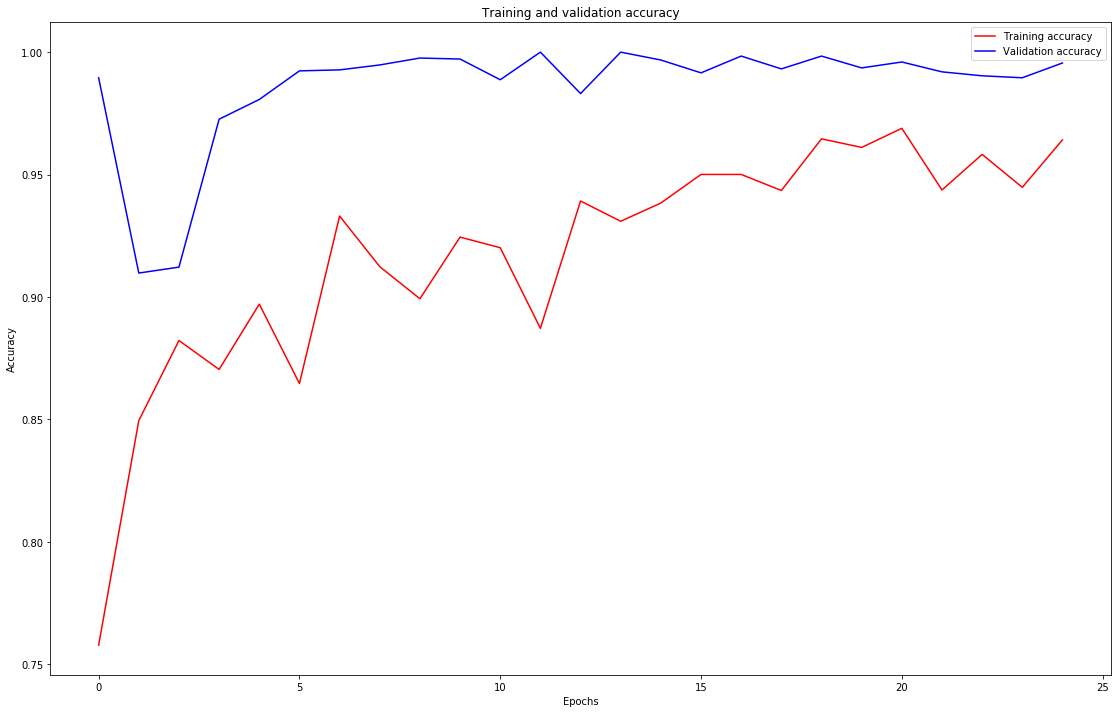

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(19,12))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>

<br><br><br><br> **Training with regularization**

In [ ]:
dropout_model = layers.Flatten()(last_output)
dropout_model =  layers.Dense(1024, activation='relu')(dropout_model)
dropout_model = layers.Dropout(0.2)(dropout_model)
dropout_model = layers.Dense(1, activation='sigmoid')(dropout_model)

model = Model(pre_trained_model.input, dropout_model)
model.compile(optimizer=RMSprop(lr=0.01),
              loss="binary_crossentropy",
              metrics=['acc'])

dropout_history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=25,
                              verbose=1,
                              validation_steps=50)

Epoch 1/25
100/100 [==============================] - 754s 8s/step - loss: 7.8323 - acc: 0.4899 - val_loss: 7.9150 - val_acc: 0.4877
Epoch 2/25
 99/100 [============================>.] - ETA: 6s - loss: 7.9172 - acc: 0.4868 

In [ ]:
acc = dropout_history.history['acc']
val_acc = dropout_history.history['val_acc']
loss = dropout_history.history['loss']
val_loss = dropout_history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(19,12))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)

plt.show()